In [1]:
import tensorflow as tf
%matplotlib inline 
from tensorflow import keras
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten ,BatchNormalization
from tensorflow.keras.optimizers import Adam,Nadam, SGD
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import cv2
import os
from os import listdir

In [2]:
cats=[]
i=0
for images in os.listdir('cats'):
    img=cv2.imread(("cats//" +images),cv2.IMREAD_UNCHANGED)
    if(type(img) == type(None)):
      pass
    else:
      resized = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
      normalize=(np.asarray(resized).astype('float32')) / 255
      cats.append(normalize)

In [3]:
dogs=[]
i=0
for images in os.listdir('dogs'):
    img=cv2.imread(("dogs//" +images),cv2.IMREAD_UNCHANGED)
    if(type(img) == type(None)):
      pass
    else:
      resized = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
      normalize=(np.asarray(resized).astype('float32')) / 255
      dogs.append(normalize)

In [4]:
data = cats+dogs
data = np.array(data)

In [5]:
data.shape

(1995, 224, 224, 3)

In [6]:
cats_labels = np.ones(len(cats))
dogs_labels = np.zeros(len(dogs))

In [7]:
labels = np.concatenate((cats_labels, dogs_labels))
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,shuffle=True,test_size=0.1)

In [9]:
x_test.shape

(200, 224, 224, 3)

In [10]:
y_test.shape

(200,)

In [11]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [12]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(lr=0.01),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 256)       295168    
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 256)       590080    
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 256)       590080    
                                                                 
 batch_normalization_2 (Batc  (None, 56, 56, 256)      1024      
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 512)       1180160   
          

In [14]:
hist = model.fit(x_train,y_train, validation_data= (x_test,y_test),epochs=100,batch_size=32,shuffle=True)

Epoch 1/100
57/57 [==============================] - 54s 711ms/step - loss: 1.8512 - accuracy: 0.5471 - val_loss: 0.9187 - val_accuracy: 0.4700
Epoch 2/100
57/57 [==============================] - 28s 497ms/step - loss: 0.6457 - accuracy: 0.6474 - val_loss: 0.7894 - val_accuracy: 0.4700
Epoch 3/100
57/57 [==============================] - 29s 503ms/step - loss: 0.5573 - accuracy: 0.7220 - val_loss: 0.8733 - val_accuracy: 0.5300
Epoch 4/100
57/57 [==============================] - 29s 502ms/step - loss: 0.4741 - accuracy: 0.7705 - val_loss: 0.8244 - val_accuracy: 0.5200
Epoch 5/100
57/57 [==============================] - 28s 498ms/step - loss: 0.3837 - accuracy: 0.8329 - val_loss: 0.8496 - val_accuracy: 0.4650
Epoch 6/100
57/57 [==============================] - 28s 500ms/step - loss: 0.2785 - accuracy: 0.8986 - val_loss: 0.8437 - val_accuracy: 0.5550
Epoch 7/100
57/57 [==============================] - 29s 501ms/step - loss: 0.2047 - accuracy: 0.9331 - val_loss: 4.5995 - val_accuracy:

In [15]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy*100," %")


7/7 [==============================] - 1s 125ms/step - loss: 2.5553 - accuracy: 0.6050
Test Loss: 2.55533504486084
Test Accuracy: 60.50000190734863  %


In [16]:
predictions = model.predict(x_test)

7/7 [==============================] - 1s 131ms/step


In [17]:
predictions_label = []
for i in range(len(predictions)):
    predictions_label.append(predictions[i].argmax())

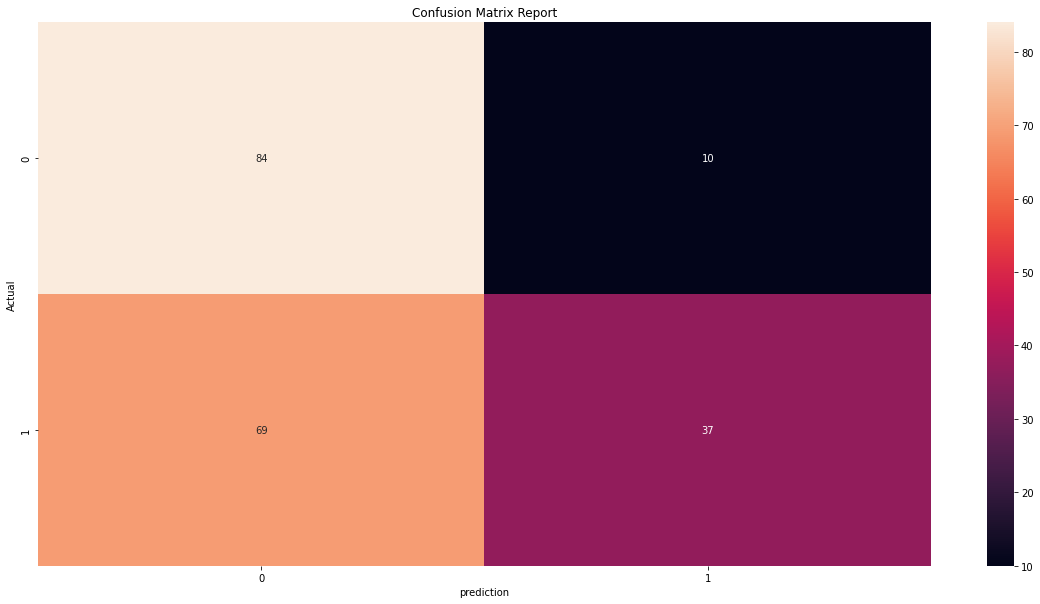

              precision    recall  f1-score   support

         0.0       0.55      0.89      0.68        94
         1.0       0.79      0.35      0.48       106

    accuracy                           0.60       200
   macro avg       0.67      0.62      0.58       200
weighted avg       0.68      0.60      0.58       200



In [18]:
plt.figure(figsize=(20,10))
cf1 = confusion_matrix(y_test,predictions_label)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix Report')
plt.show()

print(classification_report(y_test,predictions_label))